# Beginner Python and Math for Data Science
## Lecture 14
### Linear Algebra - System of Linear Equations

__Purpose:__ The purpose of this lecture is to learn how to use Linear Algebra to solve a system of linear equations.

__At the end of this lecture you will be able to:__
> 1. Understand how to solve a system of linear equations using matrix form 

In [1]:
import numpy as np 
from scipy import linalg 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline 

## 1.1 Systems of Linear Equations  

### 1.1.1 What is a System of Linear Equations?

__Overview:__ 
- __[System of Linear Equations](https://en.wikipedia.org/wiki/System_of_linear_equations):__ A system of linear equations is a collection of linear equations in which the solution must satisfy all equations in the system 
- To "solve" the system simply means to find values for the unknown variables that make both the left side and the right side equal for all equations in the system 
- It is possible to visualize the "solution" to a system of equations in both 2-dimensional and 3-dimensional space as the point that two lines intersect at (in 2-d space) and the line that two planes intersect at (in 3-d space) 

__Helpful Points:__
1. The system of equations can either be:
> a. __Consistent:__ Consistent systems have at least one solution (the lines or planes intersect at least once)<br>
> b. __Inconsistent:__ Inconsistent systems have no solution (the lines or planes never intersect) 
2. The following is an example of a system of linear equations. To "solve" this system would be to find values for $x$ and $y$ that satisfy both equations:
<center> $2x - y = 0$ </center>
<center> $-x + 2y = 3$ </center>  

### 1.1.2 Representing a System of Linear Equations:

__Overview:__ 
- There are 3 main ways to represent a system of linear equations in Linear Algebra:
> 1. __Row Picture:__ The row picture represents each equation as a line/plane in $n$-dimensional space and the solution is where the two lines/planes intersect. 
>> - To plot the linear equations on a graph in 2 or 3-dimensional space, plug in numbers for $x$ and rearrange the equation to find the associated value for $y$. Conversely, plug in numbers for $y$ and rearrange the equation to find the associated value for $x$. Remember that you need only 2 points to form a line. 
>> - For the example shown above:
<center> Equation 1: $y = 2x$ </center> 
<center> Equation 2: $y = \frac{3}{2} + \frac{x}{2}$ </center> 

> 2. __Column Picture:__ The column picture turns a system of linear equations into a single equation where coefficients become the column vectors and we are interested in finding the $x$ and $y$ values which make the linear combination equal to the right hand side vector 
>> - Recall linear combinations with vectors
>> - For the example shown above:

\begin{equation}
x
\begin{bmatrix}
    2\\
    -1
\end{bmatrix}
+ y
\begin{bmatrix}
    -1\\
    2
\end{bmatrix}
= 
\begin{bmatrix}
    0\\
    3
\end{bmatrix}
\end{equation}
> 3. __Matrix Picture:__ The matrix picture converts a system of linear equations to the following form where the solution of the system contains the values of $[x,y]^T$ that satisfied the equation.
<center> $\pmb A \pmb x = \pmb b$ </center> 
<center> Where $\pmb A$ = The coefficient matrix, $\pmb x$ = The vector of unknowns, and $\pmb b$ = The solution vector </center>

> - For the example shown above:

\begin{equation}
\begin{bmatrix}
    2 & -1\\
    -1 & 2
\end{bmatrix}
\begin{bmatrix}
    x\\
    y
\end{bmatrix}
=
\begin{bmatrix}
    0\\
    3
\end{bmatrix}
\end{equation}

__Helpful Points:__
1. It is most common to use the Matrix Picture in Linear Algebra and Data Science in general, so you should become fluent with this notation

__Practice:__ Examples of Representing Systems of Linear Equations in Python 

### Example 1 (Row Picture):

In [2]:
# 2x - y = 0 or y = 2x (input x and get output y)
def eq_1(x):
    y = 2*x
    return y 

In [3]:
eq_1(0) # first point on eq 1 line (0,0)

0

In [4]:
eq_1(1) # second point on eq 1 line (1,2)

2

In [5]:
eq_1(-1) # third point on eq 1 line (-1,-2)

-2

In [6]:
# -x + 2y = 3 or y = 3/2 + x/2
def eq_2(x):
    y = 3/2 + x/2
    return y 

In [7]:
eq_2(0) # first point on eq 2 line (0,1.5)

1.5

In [8]:
eq_2(1) # second point on eq 2 line (1,2)

2.0

In [9]:
eq_2(-1) # third point on eq 2 line (-1,1)

1.0

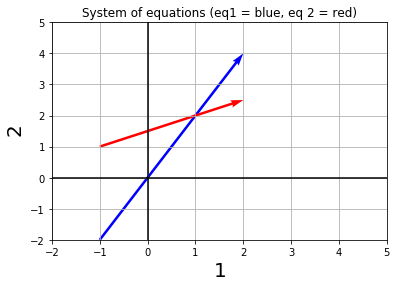

In [10]:
soa = np.array([[-1, -2, 3, 6], [-1, 1, 3, 1.5]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["blue", "red"])
ax.set_xlim([-2, 5])
ax.set_ylim([-2, 5])
plt.title('System of equations (eq1 = blue, eq 2 = red)')
plt.xlabel('$1$', fontsize = 20)
plt.ylabel('$2$', fontsize = 20)
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0, color='black', linestyle='-')
plt.grid()

We can see graphically that the "solution" to this sytem of linear equations is the point $(1,2)$ or $x = 1, y = 2$ since this is where the two lines intersect. We can test this solution by checking if these variables satisfy both equations: 

<center> Equation 1: $2(1) - 2 = 0$ </center>
<center> Equation 2: $-1 + 2(2) = 3$ </center> 

Indeed, the left side of both equations equals the right side of both equations and therefore we have found a solution to this system. It is important to note that we can see in the graph that there is only one point in which the lines intersect at, therfore this sytem has 1 solution. 

### Example 2 (Column Picture):

Recall the formulation of the column picture. Our goal is to find values of $x$ and $y$ such that the linear combination equals the right hand side vector:<br>
\begin{equation}
x
\begin{bmatrix}
    2\\
    -1
\end{bmatrix}
+ y
\begin{bmatrix}
    -1\\
    2
\end{bmatrix}
= 
\begin{bmatrix}
    0\\
    3
\end{bmatrix}
\end{equation}

Each column vector can be plotted and visualized on the graph below:

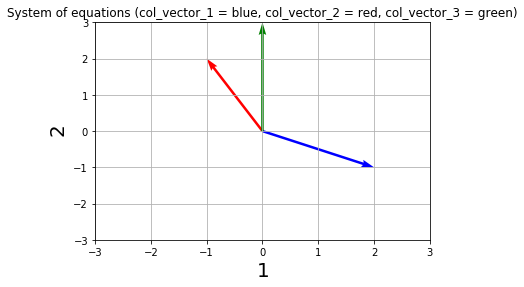

In [11]:
# plot the left hand side and right hand side vectors 
soa = np.array([[0, 0, 2, -1], [0, 0, -1, 2], [0, 0, 0, 3]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["blue", "red", "green"])
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
plt.title('System of equations (col_vector_1 = blue, col_vector_2 = red, col_vector_3 = green)')
plt.xlabel('$1$', fontsize = 20)
plt.ylabel('$2$', fontsize = 20)
plt.grid()

What if we were to multiply the red vector by 2 and then add it to the blue vector? Will we get the green vector? If we do, we will have found a solution.

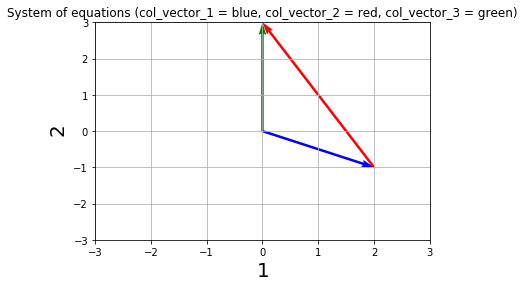

In [12]:
# plot the transformed left hand side and standard right hand side vectors 
soa = np.array([[0, 0, 2, -1], [2, -1, -2, 4], [0, 0, 0, 3]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["blue", "red", "green"])
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
plt.title('System of equations (col_vector_1 = blue, col_vector_2 = red, col_vector_3 = green)')
plt.xlabel('$1$', fontsize = 20)
plt.ylabel('$2$', fontsize = 20)
plt.grid()

Recall vector addition. The blue vector added to the transformed red vector is equal to the green vector. 

Therefore, we have arrived at the same solution as in the Row Picture - that is, $x = 1$ and $y = 2$

### Example 3 (Matrix Picture):

Recall the formulation of the Matrix Picture ($\pmb A \pmb x = \pmb b$) and shown below. Our goal is to find the unknown $x$ vector that satisfies this equation. 
\begin{equation}
\begin{bmatrix}
    2 & -1\\
    -1 & 2
\end{bmatrix}
\begin{bmatrix}
    x\\
    y
\end{bmatrix}
=
\begin{bmatrix}
    0\\
    3
\end{bmatrix}
\end{equation}

See below to solve this equation in the Matrix Form

### 1.1.3 Solving System of Linear Equations

__Overview:__ 
- Below are some of the common ways of solving systems of linear equations:
> 1. __Method 1:__ Graphically using the row and column pictures 
> 2. __Method 2:__ Using substitution, elimination, or subtraction 
> 2. __Method 3:__ Using __[Gaussian Elimination](https://en.wikipedia.org/wiki/Gaussian_elimination)__ to achieve __[Row Echelon Form (REF)](https://en.wikipedia.org/wiki/Gaussian_elimination)__
>> - Gaussian elimination uses matrix row operations (multiplication, addition, subtraction) to create an upper triangular matrix consisting of zeros on the lower triangle, ones along the main diagonal and possible non-zero values on the upper triangle which is considered the row echelon form of the original matrix 
>> - Gauss-Jordan elimintation performs the same matrix row operations as Gaussian elimination but achieves __Reduced Row Echelon Form__ by eliminating non-zero values in the upper triangle of the matrix 
>> - Following Gaussian Elimination to achieve row echelon form, back substitution is used to find values for the unknowns 
> 3. __Method 4:__ Using the inverse method if the matrix is invertible:
<center> $\pmb A \pmb x = \pmb b$ </center>
Step 1: Multiply both sides by the inverse of A $\Rightarrow$ $A^{-1}$
<center> $\pmb A^{-1} \pmb A \pmb x = \pmb A^{-1} \pmb b$ </center>
Step 2: Use the fact that $\pmb A^{-1} \pmb A = I$
<center> $\pmb I \pmb x = \pmb A^{-1} \pmb b$ </center> 
Step 3: Use the fact that $\pmb I \pmb x = \pmb x$
<center> $\pmb x = \pmb A^{-1} \pmb b$ </center> 

> 3. __Method 5:__ Using NumPy and SciPy's built in matrix solve methods: [`scipy.linalg.inv`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve) and [`numpy.linalg.inv`](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.linalg.html)

__Helpful Points:__
1. In order to solve a system of $n$ equations, we must have $n$ unknowns 
2. There are 4 possible results for a system of equations:
> a. __Solution 1:__ One unique, non-zero solution. For example, the RREF may look like:<br>
\begin{equation}
\begin{array}{ccc|c}  
 1 & 0 & 0 & 2\\  
 0 & 1 & 0 & -3\\
 0 & 0 & 1 & -5
\end{array}
\end{equation}
> b. __Solution 2:__ Infinitely many solutions (one equation is a linear combination of the other equation). For example, the RREF may look like:<br>
\begin{equation}
\begin{array}{cc|c}  
 1 & -2 & 3\\  
 0 & 0 & 0\\
\end{array}
\end{equation}
> c. __Solution 3:__ One zero solution. For example, the RREF may look like<br>
\begin{equation}
\begin{array}{cc|c}  
 0 & 5 & 0\\  
 0 & 2 & 0\\
\end{array}
\end{equation}
> d. __Solution 4:__ No solution (equations are parallel and have no intersection point). For example, the RREF may look like:<br>
\begin{equation}
\begin{array}{cc|c}  
 1 & 2 & 3\\  
 0 & 0 & 14\\
\end{array}
\end{equation}
3. Recall when we were finding values for the variables $c_1$ and $c_2$ in linear combinations and linear span. In these examples the solution was given but you will know enough after this section to go back and solve these equations yourself

__Practice:__ Examples of Solving System of Linear Equations in Python 

### Example 1 (Method 3):

Let us solve the following system of linear equations:
<center> $x + y + z = 3$ </center>
<center> $x + 2y + 3z = 0$ </center>
<center> $x + 3y + 4z = -2$ </center> 

We need to first convert the system of linear equations to the Matrix Form $\pmb A \pmb x = \pmb b$ (see above section):

The coefficient matrix:

\begin{equation}
\pmb A = 
\begin{bmatrix}
    1 & 1 & 1\\
    1 & 2 & 3\\
    1 & 3 & 4
\end{bmatrix}
\end{equation}

The vector of unknowns:

\begin{equation}
\pmb x = 
\begin{bmatrix}
    x\\
    y\\
    z
\end{bmatrix}
\end{equation}

The solution vector:

\begin{equation}
\pmb b = 
\begin{bmatrix}
    3\\
    0\\
    -2
\end{bmatrix}
\end{equation}

Then, we can create the __[Augmented Matrix](https://en.wikipedia.org/wiki/Augmented_matrix)__ in the form of $\pmb A \vert \pmb b$

\begin{equation}
\begin{array}{ccc|c}  
 1 & 1 & 1 & 3\\  
 1 & 2 & 3 & 0\\
 1 & 3 & 4 & -2
\end{array}
\end{equation}

Lastly, we can use matrix row operations to obtain reduced row echelon form (ones along the diagonal, zeros everywhere else except for the augmented portion)

__Step 1:__ Re-write the first row and then ask the question - how can the element $A_{21}$ go to 0? How about subtracting the first row from the second row - $R_2 - R_1$:

\begin{equation}
\begin{array}{ccc|c}  
 1 & 1 & 1 & 3\\  
 R_2 - R_1\\ 0 & 1 & 2 & -3\\
 1 & 3 & 4 & -2
\end{array}
\end{equation}

__Step 2:__ Re-write the first and second row and then ask the question - how can the element $A_{31}$ go to 0? How about subtracting the first row from the third row - $R_3 - R_1$:

\begin{equation}
\begin{array}{ccc|c}  
 1 & 1 & 1 & 3\\  
 0 & 1 & 2 & -3\\
 R_3 - R_1\\ 0 & 2 & 3 & -5
\end{array}
\end{equation}

__Step 3:__ Re-write the second and the third row and then ask the question - How can the element $A_{12}$ go to 0? How about subtracting the second row from the first row - $R_1 - R_2$:

\begin{equation}
\begin{array}{ccc|c}  
 R_1 - R_2\\ 1 & 0 & -1 & 6\\  
 0 & 1 & 2 & -3\\
 0 & 2 & 3 & -5
\end{array}
\end{equation}

__Step 4:__ Re-write the first and second row and then ask the queestion - How can the element $A_{32}$ go to 0? How about subtracting the third row from 2 times the second row - $2R_2 - R_3$:

\begin{equation}
\begin{array}{ccc|c}  
 1 & 0 & -1 & 6\\  
 0 & 1 & 2 & -3\\
 2R_2-R_3\\ 0 & 0 & 1 & -1
\end{array}
\end{equation}

__Step 5:__ Re-write the second and third row and then ask the queestion - How can the element $A_{13}$ go to 0? How about adding the third row to the first row - $R_1 + R_3$:

\begin{equation}
\begin{array}{ccc|c}  
 R_1+R_3\\ 1 & 0 & 0 & 5\\  
 0 & 1 & 2 & -3\\
 0 & 0 & 1 & -1
\end{array}
\end{equation}

__Step 6:__ Re-write the first and the third row and then ask the queestion - How can the element $A_{23}$ go to 0? How about subtracting 2 times the third row from the second row - $R_2 - 2R_3$:

\begin{equation}
\begin{array}{ccc|c}  
 1 & 0 & 0 & 5\\  
 R_2 - 2R_3\\0 & 1 & 0 & -1\\
 0 & 0 & 1 & -1
\end{array}
\end{equation}

We now have obtained the __Reduced Row Echelon Form__ of the matrix $\pmb A$. Technically, we only needed the lower triangle of zeros to obtain __Row Echelon Form__, but the reduced version makes it abundantly clear and exceptionally easy to discern unknown values for $x$, $y$, and $z$:

<center> $1x + 0y + 0z = 5$ </center>
<center> $0x + 1y + 0z = -1$ </center>
<center> $0x + 0y + 1z = -1$ </center>

Therefore, $x = 5$, $y = -1$, and $z = -1$. We can test this is the correct solution by plugging these values back into the system of equations: 

<center> $1(5) + 0y + 0z = 5$ </center>
<center> $0x + 1(-1) + 0z = -1$ </center>
<center> $0x + 0y + 1(-1) = -1$ </center>

### Example 2 (Method 4):

In [13]:
A = np.array([[1,1,1],[1,2,3],[1,3,4]])
b = np.array([3,0,-2])
print(A)
print(b)

[[1 1 1]
 [1 2 3]
 [1 3 4]]
[ 3  0 -2]


In [14]:
A_inv = np.linalg.inv(A)
print(A_inv)

[[ 1.  1. -1.]
 [ 1. -3.  2.]
 [-1.  2. -1.]]


In [17]:
np.dot(A_inv, b)

array([ 5., -1., -1.])

We obtain the same solution in Method 4 as was obtained in Method 3.

### Example 3 (Method 5):

In [18]:
linalg.solve(A, b) # using scipy 

array([ 5., -1., -1.])

In [19]:
np.linalg.solve(A, b) # using numpy

array([ 5., -1., -1.])

We obtained the same solution in Method 5 as was obtained Method 3 and 4.

### Example 4 (Using RREF to find a Matrix Inverse for an Invertible Matrix):

As promised, it is possible to find the inverse of a matrix using Gaussian elimination and the Reduced Row Echelon Form:

If 
\begin{equation}
\pmb A = 
\begin{bmatrix}
    A_{11} & A_{12} & A_{13}\\
    A_{21} & A_{22} & A_{23}\\
    A_{31} & A_{32} & A_{33}
\end{bmatrix}
\end{equation}

Then, the augmented matrix is 
\begin{equation}
\begin{array}{ccc|ccc}  
    A_{11} & A_{12} & A_{13} & 1 & 0 & 0\\
    A_{21} & A_{22} & A_{23} & 0 & 1 & 0\\
    A_{31} & A_{32} & A_{33} & 0 & 0 & 1
\end{array}
\end{equation}

By performing Gaussian Elimination on the above Augmented Matrix and achieving RREF in the matrix to the left, the matrix to the right will become the inverse matrix. 

For example, 

If 
\begin{equation}
\pmb A = 
\begin{bmatrix}
    2 & 1 & 1\\
    3 & 2 & 1\\
    2 & 1 & 2
\end{bmatrix}
\end{equation}

Then, the augmented matrix becomes: 
\begin{equation}
\begin{array}{ccc|ccc}  
    2 & 1 & 1 & 1 & 0 & 0\\
    3 & 2 & 1 & 0 & 1 & 0\\
    2 & 1 & 2 & 0 & 0 & 1
\end{array}
\end{equation}    

After obtaining RREF on the left matrix, we are left with the inverse matrix on the right: 
\begin{equation}
\begin{array}{ccc|ccc}  
    1 & 0 & 0 & 3 & -1 & -1\\
    0 & 1 & 0 & -4 & 2 & 1\\
    0 & 0 & 1 & -1 & 0 & 1
\end{array}
\end{equation}

Verify this below:

In [20]:
A = np.array([[2,1,1],[3,2,1],[2,1,2]])
print(A)

[[2 1 1]
 [3 2 1]
 [2 1 2]]


In [21]:
linalg.inv(A) # using scipy 

array([[ 3., -1., -1.],
       [-4.,  2.,  1.],
       [-1.,  0.,  1.]])

In [22]:
np.linalg.inv(A) # using numpy 

array([[ 3., -1., -1.],
       [-4.,  2.,  1.],
       [-1.,  0.,  1.]])

### Problem 1

For the following matrix 

\begin{equation}
\pmb A = 
\begin{bmatrix}
    1 & 2 & 1\\
    2 & 2 & 2\\
    1 & 0 & 1
\end{bmatrix}
\end{equation}

Manually find the reduced row echelon form

In [ ]:
# write your code here 





### SOLUTIONS

### Problem 1

For the following matrix 

\begin{equation}
\pmb A = 
\begin{bmatrix}
    1 & 2 & 1\\
    2 & 2 & 2\\
    1 & 0 & 1
\end{bmatrix}
\end{equation}

Manually find the reduced row echelon form

\begin{equation}
\pmb A = 
\begin{bmatrix}
    1 & 2 & 1\\
    2 & 2 & 2\\
    1 & 0 & 1
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
    1 & 2 & 1\\
    0 & -2 & 0\\
    0 & -2 & 0
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
    1 & 2 & 1\\
    0 & -2 & 0\\
    0 & 0 & 0
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
    1 & 0 & 1\\
    0 & -2 & 0\\
    0 & 0 & 0
\end{bmatrix}
\Rightarrow
\begin{bmatrix}
    1 & 0 & 1\\
    0 & 1 & 0\\
    0 & 0 & 0
\end{bmatrix}
\end{equation}